In [9]:
# import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read image as grayscale

Shape:  (128, 128)


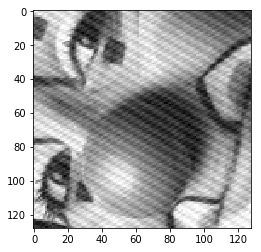

In [10]:
# read image as grayscale
img = cv2.imread('clown.jpg', 0)

print("Shape: ", img.shape)
plt.imshow(img, cmap='gray');

### Convert to Frequency domain and shift to center

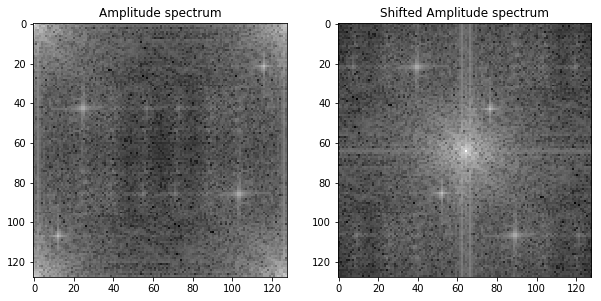

In [11]:
# FFT of Image, shifted to center
img_dft = np.fft.fft2(img)
shifted_img = np.fft.fftshift(img_dft)

# Get the amplitude of image
amplitude_img = np.abs(img_dft)
log_amplitude_img = 20*np.log(amplitude_img)

# Get the amplitude of shifted image
amplitude_img_shifted = np.abs(shifted_img)
log_amplitude_img_shifted = 20*np.log(amplitude_img_shifted)


# Plot dft
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(log_amplitude_img, cmap='gray');
axs[0].set_title('Amplitude spectrum');
axs[1].imshow(log_amplitude_img_shifted, cmap='gray');
axs[1].set_title('Shifted Amplitude spectrum');

### Search for peaks

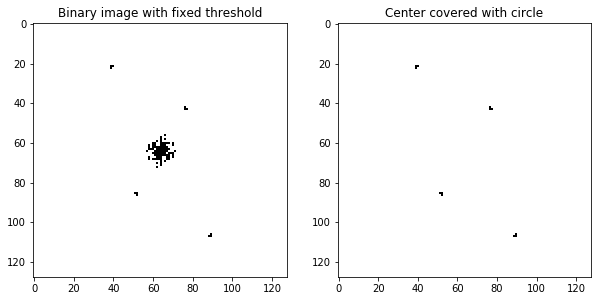

In [12]:
# Convert to binary image by threshold
threshold = 210
ret,thresh = cv2.threshold(log_amplitude_img_shifted,threshold,255,cv2.THRESH_BINARY_INV)
height, width  = thresh.shape[0]/2, thresh.shape[1]/2

# Plot
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(thresh, cmap='gray');
axs[0].set_title('Binary image with fixed threshold');

# Draw circle at the center to hide low frequencies
radius = 18
thresh_circle = cv2.circle(thresh,(int(width), int(height)), radius, (255,255,255), -1)

axs[1].imshow(thresh_circle, cmap='gray');
axs[1].set_title('Center covered with circle');


### Draw circles at periodic peaks

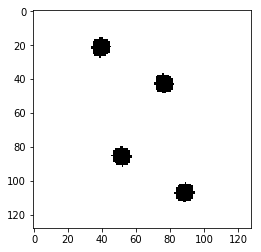

In [13]:
# Get coordinates of peaks
coordinates = np.where(thresh_circle < 1)
listOfCoordinates= list(zip(coordinates[1], coordinates[0]))

for c in listOfCoordinates:
    mask = cv2.circle(thresh_circle,c, 5, (0,0,0), -1)
#mask = cv2.GaussianBlur(mask,(5,5),1)

plt.imshow(mask, cmap = 'gray');

### Masked Spectrum

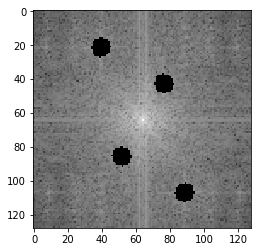

In [14]:
# Multiply to see masked spectrum
masked_spectrum = mask*log_amplitude_img_shifted
plt.imshow(masked_spectrum, cmap='gray');

### Multiply and convert back to spatial domain

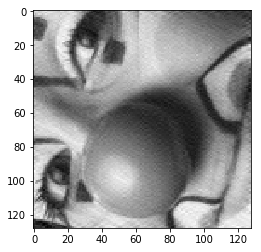

In [15]:
# Multiply mask with image in frequency domain
fshift = np.multiply(mask, shifted_img)

"""
amplitude_img_shifted = np.abs(shifted_img)
phase_img_shifted = np.angle(shifted_img);
amplitude_img_shifted = amplitude_img_shifted*mask
fshift = amplitude_img_shifted*np.exp(1j*phase_img_shifted)
"""

# Shift back to origin
f_ishift = np.fft.ifftshift(fshift)

# Inverse FFT
inverse_fft = np.fft.ifft2(f_ishift)

# Take the real part of complex number
filtered = np.real(inverse_fft)

plt.imshow(filtered, cmap='gray');
plt.imsave('clown_new.png',filtered, cmap='gray')

### Plot all

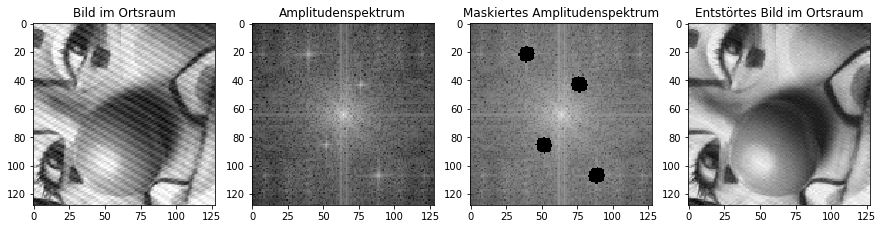

In [16]:
fig, axs = plt.subplots(1, 4, figsize=(15, 15))
axs[0].imshow(img, cmap='gray');
axs[0].set_title('Bild im Ortsraum');
axs[1].imshow(log_amplitude_img_shifted, cmap='gray');
axs[1].set_title('Amplitudenspektrum');
axs[2].imshow(masked_spectrum, cmap='gray');
axs[2].set_title('Maskiertes Amplitudenspektrum');
axs[3].imshow(filtered, cmap='gray');
axs[3].set_title('Entstörtes Bild im Ortsraum');

plt.savefig('Clown_artifact_reduced.png')